In [1]:
from numpy import *
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [ ]:
# Range of time (unit: year)
t = arange(0, 650, 1)
# Range of age (unit: year)
age = arange(1, 1001)
# Concentration of CO2
X_at = [1715 * exp(0.0305 * ti) / (1715 + exp(0.0305 * ti) - 1) + 284 for ti in t]
# Global annual mean temperature
sigma = 4.5
Ts = [15 + (sigma / log(2)) * log(Xa / 285)
      for Xa in X_at]

############# Input #############
x = 0.65
Gamma_Ts = [42.7 + 1.68 * (T - 25) + 0.012 * (T - 25) ** 2 for T in Ts]
Beta_X_Ts = [(3 * x * Xa * Gamma) / ((x * Xa - Gamma) * (x * Xa + 2 * Gamma)) for Xa, Gamma in zip(X_at, Gamma_Ts)]
s0 = 300 # Input at initial time
# Input
S1 = [s0 * (1 + 2.14 * Beta * log(Xa / 285)) for Beta, Xa in zip(Beta_X_Ts, X_at)]
# Temperature scale
Var = [2 ** (0.1 * new - 1.5) for new in Ts]


#############
# cue and v_s_rMM
#############
########################### u_b = 0.7
cue = linspace(0.2, 0.6, 50)
v_s_rMM = linspace(0.02, 0.06, 50)
u_b = 0.7
CUE, V_S_rMM = meshgrid(cue, v_s_rMM)
CUE = ravel(CUE)
V_S_rMM = ravel(V_S_rMM)

# model A
k = 0.1
K_b = 100
v_l_rMM = 0.84

C_s_A = [(k + 1 / (e ** (-1) - 1)) * S1[0] / Us + (1 + k * (e ** (-1) - 1))
         * u_b * K_b / Us for e, Us in zip(CUE, V_S_rMM)]
C_b_A = [S1[0] / (e ** (-1) - 1 * u_b) for e in CUE]
C_l_A = [(1 - k) * S1[0] / v_l_rMM + (e ** (-1) - 1) * (1 - k) * u_b * K_b / v_l_rMM for e in CUE]

B0_A = [mat([
    [-v_l_rMM * CbA / (CbA + K_b), 0, 0],
    [0, -US * CbA / (CbA + K_b), u_b],
    [e * v_l_rMM * CbA / (CbA + K_b), e * US * CbA / (CbA + K_b), -u_b]
]) for CbA, US, e in zip(C_b_A, V_S_rMM, CUE)]

U_t = mat([
    [(1 - k) * S1[0]],
    [k * S1[0]],
    [0]
])

p0_a = []
for num in range(0, 2500):
    p0_a_tem = []
    for age1 in age:
        p0_a_tem1 = expm(age1 * B0_A[num]) * U_t
        p0_a_tem.append(p0_a_tem1)
    pa_pre = hstack(p0_a_tem)
    list_P_a = sum(pa_pre, axis=0)
    mean_age = []
    for i in range(1, 1001):
        pa_tem = i * list_P_a[0, i - 1]
        mean_age.append(pa_tem)
    mean_rMM = sum(mean_age) / sum(list_P_a[0, :1000])
    p0_a.append(mean_rMM)
p01 = array(p0_a).reshape(50, 50)
p0_1 = log10(p01)
save('F://论文//模型//Wang//np_file//lastest//Figure. S6 (a)', p0_1)

########################### U_b = 0.8
cue = linspace(0.2, 0.6, 50)
v_s_rMM = linspace(0.02, 0.06, 50)
u_b = 0.8
CUE, V_S_rMM = meshgrid(cue, v_s_rMM)
CUE = ravel(CUE)
V_S_rMM = ravel(V_S_rMM)

# model A
k = 0.1
K_b = 100
v_l_rMM = 0.84

C_s_A = [(k + 1 / (e ** (-1) - 1)) * S1[0] / Us + (1 + k * (e ** (-1) - 1))
         * u_b * K_b / Us for e, Us in zip(CUE, V_S_rMM)]
C_b_A = [S1[0] / (e ** (-1) - 1 * u_b) for e in CUE]
C_l_A = [(1 - k) * S1[0] / v_l_rMM + (e ** (-1) - 1) * (1 - k) * u_b * K_b / v_l_rMM for e in CUE]

B0_A = [mat([
    [-v_l_rMM * CbA / (CbA + K_b), 0, 0],
    [0, -US * CbA / (CbA + K_b), u_b],
    [e * v_l_rMM * CbA / (CbA + K_b), e * US * CbA / (CbA + K_b), -u_b]
]) for CbA, US, e in zip(C_b_A, V_S_rMM, CUE)]

U_t = mat([
    [(1 - k) * S1[0]],
    [k * S1[0]],
    [0]
])

p0_a = []
for num in range(0, 2500):
    p0_a_tem = []
    for age1 in age:
        p0_a_tem1 = expm(age1 * B0_A[num]) * U_t
        p0_a_tem.append(p0_a_tem1)
    pa_pre = hstack(p0_a_tem)
    list_P_a = sum(pa_pre, axis=0)
    mean_age = []
    for i in range(1, 1001):
        pa_tem = i * list_P_a[0, i - 1]
        mean_age.append(pa_tem)
    mean_rMM = sum(mean_age) / sum(list_P_a[0, :1000])
    p0_a.append(mean_rMM)
p01 = array(p0_a).reshape(50, 50)
p0_1 = log10(p01)
save('F://论文//模型//Wang//np_file//lastest//Figure. S6 (b)', p0_1)

########################### U_b = 0.9
cue = linspace(0.2, 0.6, 50)
v_s_rMM = linspace(0.02, 0.06, 50)
u_b = 0.9
CUE, V_S_rMM = meshgrid(cue, v_s_rMM)
CUE = ravel(CUE)
V_S_rMM = ravel(V_S_rMM)

# model A
k = 0.1
K_b = 100
v_l_rMM = 0.84

C_s_A = [(k + 1 / (e ** (-1) - 1)) * S1[0] / Us + (1 + k * (e ** (-1) - 1))
         * u_b * K_b / Us for e, Us in zip(CUE, V_S_rMM)]
C_b_A = [S1[0] / (e ** (-1) - 1 * u_b) for e in CUE]
C_l_A = [(1 - k) * S1[0] / v_l_rMM + (e ** (-1) - 1) * (1 - k) * u_b * K_b / v_l_rMM for e in CUE]

B0_A = [mat([
    [-v_l_rMM * CbA / (CbA + K_b), 0, 0],
    [0, -US * CbA / (CbA + K_b), u_b],
    [e * v_l_rMM * CbA / (CbA + K_b), e * US * CbA / (CbA + K_b), -u_b]
]) for CbA, US, e in zip(C_b_A, V_S_rMM, CUE)]

U_t = mat([
    [(1 - k) * S1[0]],
    [k * S1[0]],
    [0]
])

p0_a = []
for num in range(0, 2500):
    p0_a_tem = []
    for age1 in age:
        p0_a_tem1 = expm(age1 * B0_A[num]) * U_t
        p0_a_tem.append(p0_a_tem1)
    pa_pre = hstack(p0_a_tem)
    list_P_a = sum(pa_pre, axis=0)
    mean_age = []
    for i in range(1, 1001):
        pa_tem = i * list_P_a[0, i - 1]
        mean_age.append(pa_tem)
    mean_rMM = sum(mean_age) / sum(list_P_a[0, :1000])
    p0_a.append(mean_rMM)
p01 = array(p0_a).reshape(50, 50)
p0_1 = log10(p01)
save('F://论文//模型//Wang//np_file//lastest//Figure. S6 (c)', p0_1)

#############
# v_s_rMM and u_b
#############
#################### cue = 0.29
cue = 0.29
v_s_rMM = linspace(0.02, 0.06, 50)
u_b = linspace(0.1, 1, 50)
k = 0.1
K_b = 100
v_l_rMM = 0.84
U_B, V_S_rMM = meshgrid(u_b, v_s_rMM)
U_B = ravel(U_B)
V_S_rMM = ravel(V_S_rMM)

C_s_A = [(k + 1 / (cue ** (-1) - 1)) * S1[0] / Us + (1 + k * (cue ** (-1) - 1)) * Ub * K_b / Us for Us, Ub in
         zip(V_S_rMM, U_B)]
C_b_A = [S1[0] / (cue ** (-1) - 1 * Ub) for Ub in U_B]
C_l_A = [(1 - k) * S1[0] / v_l_rMM + (cue ** (-1) - 1) * (1 - k) * Ub * K_b / v_l_rMM for Ub in U_B]

B0_A = [mat([
    [-v_l_rMM * CbA / (CbA + K_b), 0, 0],
    [0, -Us * CbA / (CbA + K_b), Ub],
    [cue * v_l_rMM * CbA / (CbA + K_b), cue * Us * CbA / (CbA + K_b), -Ub]
]) for CbA, Ub, Us in zip(C_b_A, U_B, V_S_rMM)]

U_t = mat([
    [(1 - k) * S1[0]],
    [k * S1[0]],
    [0]
])

p0_a = []
for num in range(0, 2500):
    p0_a_tem = []
    for age1 in age:
        p0_a_tem1 = expm(age1 * B0_A[num]) * U_t
        p0_a_tem.append(p0_a_tem1)
    pa_pre = hstack(p0_a_tem)
    list_P_a = sum(pa_pre, axis=0)
    mean_age = []
    for i in range(1, 1001):
        pa_tem = i * list_P_a[0, i - 1]
        mean_age.append(pa_tem)
    mean_rMM = sum(mean_age) / sum(list_P_a[0, :1000])
    p0_a.append(mean_rMM)
p03 = array(p0_a).reshape(50, 50)
p0_3 = log10(p03)
save('F://论文//模型//Wang//np_file//lastest//Figure. S6 (d)', p0_3)

#################### cue = 0.39
cue = 0.39
v_s_rMM = linspace(0.02, 0.06, 50)
u_b = linspace(0.1, 1, 50)
k = 0.1
K_b = 100
v_l_rMM = 0.84
U_B, V_S_rMM = meshgrid(u_b, v_s_rMM)
U_B = ravel(U_B)
V_S_rMM = ravel(V_S_rMM)

C_s_A = [(k + 1 / (cue ** (-1) - 1)) * S1[0] / Us + (1 + k * (cue ** (-1) - 1)) * Ub * K_b / Us for Us, Ub in
         zip(V_S_rMM, U_B)]
C_b_A = [S1[0] / (cue ** (-1) - 1 * Ub) for Ub in U_B]
C_l_A = [(1 - k) * S1[0] / v_l_rMM + (cue ** (-1) - 1) * (1 - k) * Ub * K_b / v_l_rMM for Ub in U_B]

B0_A = [mat([
    [-v_l_rMM * CbA / (CbA + K_b), 0, 0],
    [0, -Us * CbA / (CbA + K_b), Ub],
    [cue * v_l_rMM * CbA / (CbA + K_b), cue * Us * CbA / (CbA + K_b), -Ub]
]) for CbA, Ub, Us in zip(C_b_A, U_B, V_S_rMM)]

U_t = mat([
    [(1 - k) * S1[0]],
    [k * S1[0]],
    [0]
])

p0_a = []
for num in range(0, 2500):
    p0_a_tem = []
    for age1 in age:
        p0_a_tem1 = expm(age1 * B0_A[num]) * U_t
        p0_a_tem.append(p0_a_tem1)
    pa_pre = hstack(p0_a_tem)
    list_P_a = sum(pa_pre, axis=0)
    mean_age = []
    for i in range(1, 1001):
        pa_tem = i * list_P_a[0, i - 1]
        mean_age.append(pa_tem)
    mean_rMM = sum(mean_age) / sum(list_P_a[0, :1000])
    p0_a.append(mean_rMM)
p03 = array(p0_a).reshape(50, 50)
p0_3 = log10(p03)
save('F://论文//模型//Wang//np_file//lastest//Figure. S6 (e)', p0_3)

#################### cue = 0.49
cue = 0.49
v_s_rMM = linspace(0.02, 0.06, 50)
u_b = linspace(0.1, 1, 50)
k = 0.1
K_b = 100
v_l_rMM = 0.84
U_B, V_S_rMM = meshgrid(u_b, v_s_rMM)
U_B = ravel(U_B)
V_S_rMM = ravel(V_S_rMM)

C_s_A = [(k + 1 / (cue ** (-1) - 1)) * S1[0] / Us + (1 + k * (cue ** (-1) - 1)) * Ub * K_b / Us for Us, Ub in
         zip(V_S_rMM, U_B)]
C_b_A = [S1[0] / (cue ** (-1) - 1 * Ub) for Ub in U_B]
C_l_A = [(1 - k) * S1[0] / v_l_rMM + (cue ** (-1) - 1) * (1 - k) * Ub * K_b / v_l_rMM for Ub in U_B]

B0_A = [mat([
    [-v_l_rMM * CbA / (CbA + K_b), 0, 0],
    [0, -Us * CbA / (CbA + K_b), Ub],
    [cue * v_l_rMM * CbA / (CbA + K_b), cue * Us * CbA / (CbA + K_b), -Ub]
]) for CbA, Ub, Us in zip(C_b_A, U_B, V_S_rMM)]

U_t = mat([
    [(1 - k) * S1[0]],
    [k * S1[0]],
    [0]
])

p0_a = []
for num in range(0, 2500):
    p0_a_tem = []
    for age1 in age:
        p0_a_tem1 = expm(age1 * B0_A[num]) * U_t
        p0_a_tem.append(p0_a_tem1)
    pa_pre = hstack(p0_a_tem)
    list_P_a = sum(pa_pre, axis=0)
    mean_age = []
    for i in range(1, 1001):
        pa_tem = i * list_P_a[0, i - 1]
        mean_age.append(pa_tem)
    mean_rMM = sum(mean_age) / sum(list_P_a[0, :1000])
    p0_a.append(mean_rMM)
p03 = array(p0_a).reshape(50, 50)
p0_3 = log10(p03)
save('F://论文//模型//Wang//np_file//lastest//Figure. S6 (f)', p0_3)

#############
# cue and u_b
#############
############################## v_s_rMM = 0.018
v_s_rMM = 0.018
cue = linspace(0.2, 0.6, 50)
u_b = linspace(0.1, 1, 50)
k = 0.1
K_b = 100
v_l_rMM = 0.84
U_B, CUE = meshgrid(u_b, cue)
U_B = ravel(U_B)
CUE = ravel(CUE)

C_s_A = [(k + 1 / (e ** (-1) - 1)) * S1[0] / v_s_rMM + (1 + k * (e ** (-1) - 1)) * Ub * K_b / v_s_rMM for e, Ub in
         zip(CUE, U_B)]
C_b_A = [S1[0] / (e ** (-1) - 1 * Ub) for e, Ub in zip(CUE, U_B)]
C_l_A = [(1 - k) * S1[0] / v_l_rMM + (e ** (-1) - 1) * (1 - k) * Ub * K_b / v_l_rMM for e, Ub in zip(CUE, U_B)]

B0_A = [mat([
    [-v_l_rMM * CbA / (CbA + K_b), 0, 0],
    [0, -v_s_rMM * CbA / (CbA + K_b), Ub],
    [e * v_l_rMM * CbA / (CbA + K_b), e * v_s_rMM * CbA / (CbA + K_b), -Ub]
]) for CbA, Ub, e in zip(C_b_A, U_B, CUE)]

U_t = mat([
    [(1 - k) * S1[0]],
    [k * S1[0]],
    [0]
])

p0_a = []
for num in range(0, 2500):
    p0_a_tem = []
    for age1 in age:
        p0_a_tem1 = expm(age1 * B0_A[num]) * U_t
        p0_a_tem.append(p0_a_tem1)
    pa_pre = hstack(p0_a_tem)
    list_P_a = sum(pa_pre, axis=0)
    mean_age = []
    for i in range(1, 1001):
        pa_tem = i * list_P_a[0, i - 1]
        mean_age.append(pa_tem)
    mean_rMM = sum(mean_age) / sum(list_P_a[0, :1000])
    p0_a.append(mean_rMM)
p05 = array(p0_a).reshape(50, 50)
p0_5 = log10(p05)
save('F://论文//模型//Wang//np_file//lastest//Figure. S6 (g)', p0_5)

############################## v_s_rMM = 0.028
v_s_rMM = 0.028
cue = linspace(0.2, 0.6, 50)
u_b = linspace(0.1, 1, 50)
k = 0.1
K_b = 100
v_l_rMM = 0.84
U_B, CUE = meshgrid(u_b, cue)
U_B = ravel(U_B)
CUE = ravel(CUE)

C_s_A = [(k + 1 / (e ** (-1) - 1)) * S1[0] / v_s_rMM + (1 + k * (e ** (-1) - 1)) * Ub * K_b / v_s_rMM for e, Ub in
         zip(CUE, U_B)]
C_b_A = [S1[0] / (e ** (-1) - 1 * Ub) for e, Ub in zip(CUE, U_B)]
C_l_A = [(1 - k) * S1[0] / v_l_rMM + (e ** (-1) - 1) * (1 - k) * Ub * K_b / v_l_rMM for e, Ub in zip(CUE, U_B)]

B0_A = [mat([
    [-v_l_rMM * CbA / (CbA + K_b), 0, 0],
    [0, -v_s_rMM * CbA / (CbA + K_b), Ub],
    [e * v_l_rMM * CbA / (CbA + K_b), e * v_s_rMM * CbA / (CbA + K_b), -Ub]
]) for CbA, Ub, e in zip(C_b_A, U_B, CUE)]

U_t = mat([
    [(1 - k) * S1[0]],
    [k * S1[0]],
    [0]
])

p0_a = []
for num in range(0, 2500):
    p0_a_tem = []
    for age1 in age:
        p0_a_tem1 = expm(age1 * B0_A[num]) * U_t
        p0_a_tem.append(p0_a_tem1)
    pa_pre = hstack(p0_a_tem)
    list_P_a = sum(pa_pre, axis=0)
    mean_age = []
    for i in range(1, 1001):
        pa_tem = i * list_P_a[0, i - 1]
        mean_age.append(pa_tem)
    mean_rMM = sum(mean_age) / sum(list_P_a[0, :1000])
    p0_a.append(mean_rMM)
p05 = array(p0_a).reshape(50, 50)
p0_5 = log10(p05)
save('F://论文//模型//Wang//np_file//lastest//Figure. S6 (h)', p0_5)

############################## v_s_rMM = 0.038
v_s_rMM = 0.038
cue = linspace(0.2, 0.6, 50)
u_b = linspace(0.1, 1, 50)
k = 0.1
K_b = 100
v_l_rMM = 0.84
U_B, CUE = meshgrid(u_b, cue)
U_B = ravel(U_B)
CUE = ravel(CUE)

C_s_A = [(k + 1 / (e ** (-1) - 1)) * S1[0] / v_s_rMM + (1 + k * (e ** (-1) - 1)) * Ub * K_b / v_s_rMM for e, Ub in
         zip(CUE, U_B)]
C_b_A = [S1[0] / (e ** (-1) - 1 * Ub) for e, Ub in zip(CUE, U_B)]
C_l_A = [(1 - k) * S1[0] / v_l_rMM + (e ** (-1) - 1) * (1 - k) * Ub * K_b / v_l_rMM for e, Ub in zip(CUE, U_B)]

B0_A = [mat([
    [-v_l_rMM * CbA / (CbA + K_b), 0, 0],
    [0, -v_s_rMM * CbA / (CbA + K_b), Ub],
    [e * v_l_rMM * CbA / (CbA + K_b), e * v_s_rMM * CbA / (CbA + K_b), -Ub]
]) for CbA, Ub, e in zip(C_b_A, U_B, CUE)]

U_t = mat([
    [(1 - k) * S1[0]],
    [k * S1[0]],
    [0]
])

p0_a = []
for num in range(0, 2500):
    p0_a_tem = []
    for age1 in age:
        p0_a_tem1 = expm(age1 * B0_A[num]) * U_t
        p0_a_tem.append(p0_a_tem1)
    pa_pre = hstack(p0_a_tem)
    list_P_a = sum(pa_pre, axis=0)
    mean_age = []
    for i in range(1, 1001):
        pa_tem = i * list_P_a[0, i - 1]
        mean_age.append(pa_tem)
    mean_rMM = sum(mean_age) / sum(list_P_a[0, :1000])
    p0_a.append(mean_rMM)
p05 = array(p0_a).reshape(50, 50)
p0_5 = log10(p05)
save('F://论文//模型//Wang//np_file//lastest//Figure. S6 (i)', p0_5)



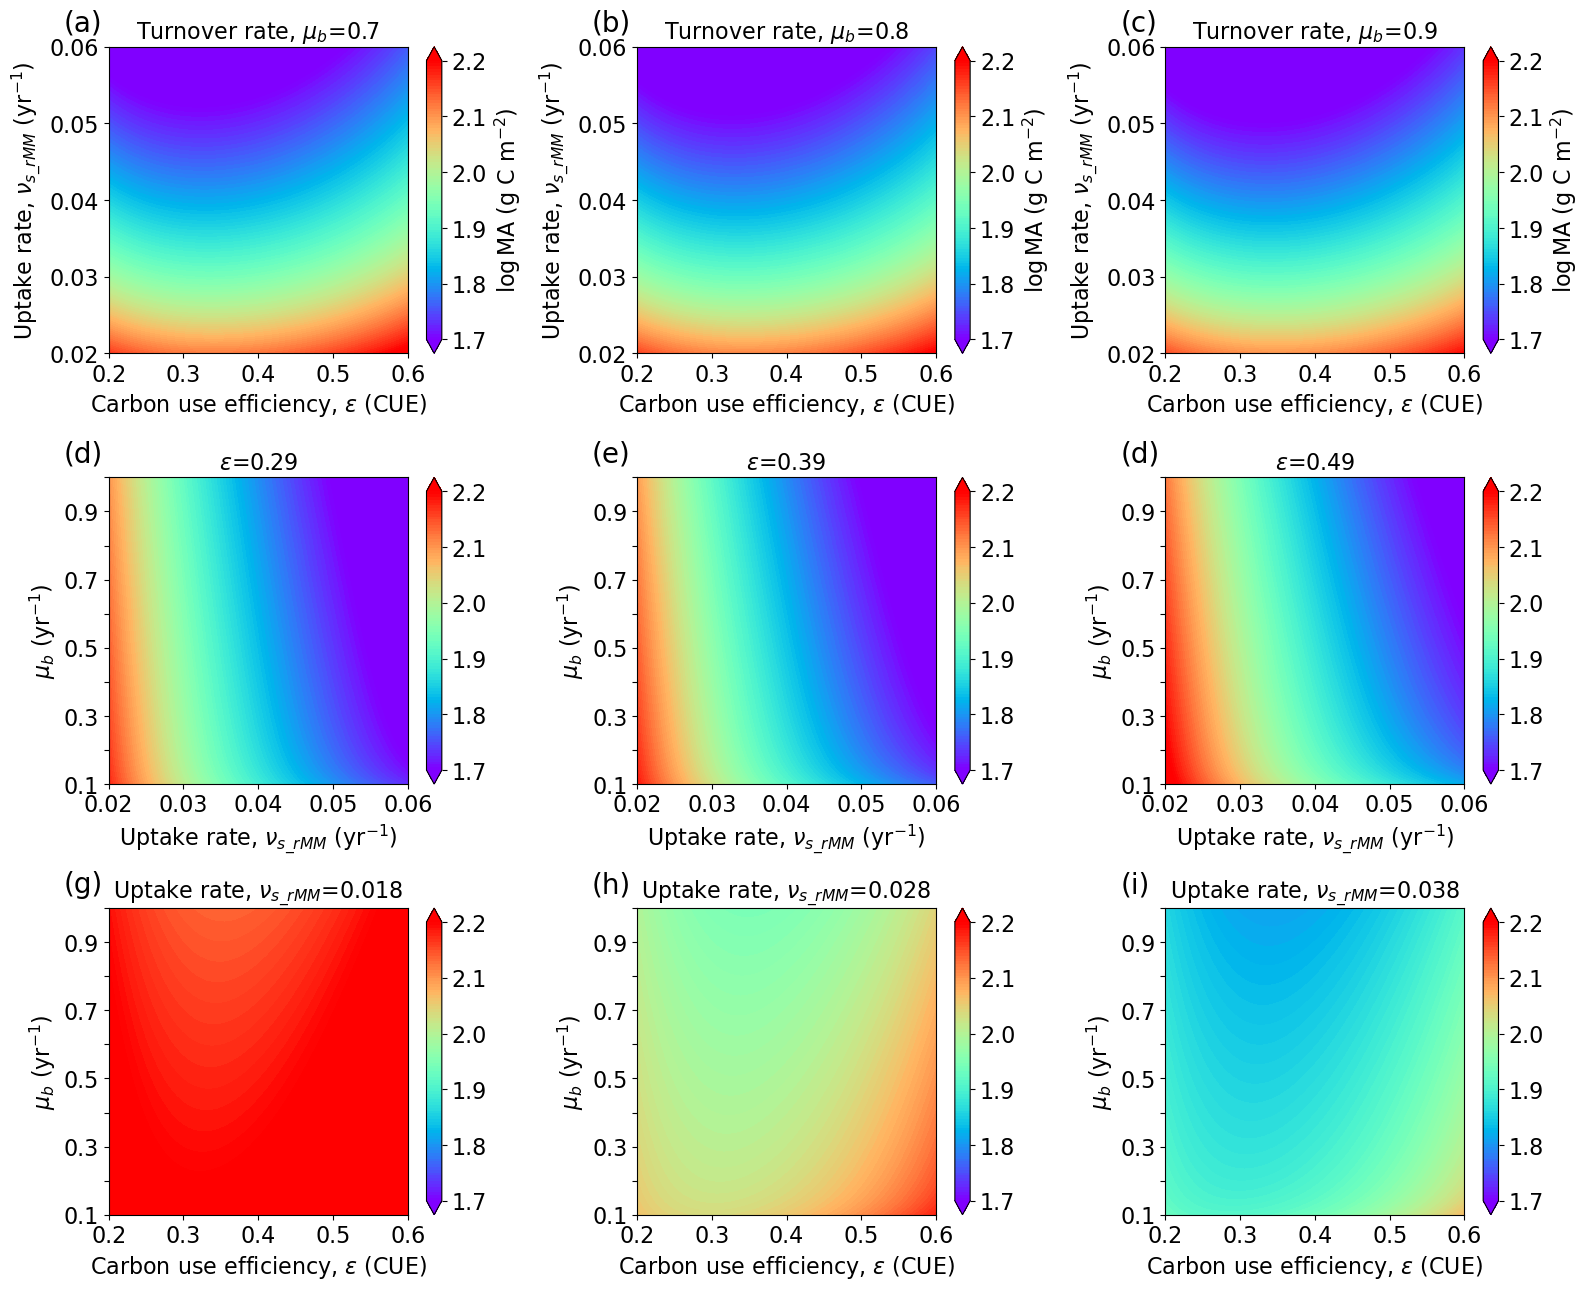

In [4]:
###################################################
###################################################
# plot
###################################################
###################################################

fig = plt.figure(figsize=(16, 13))
ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title('Turnover rate, $\mu_b$=0.7', fontsize=16)
ax1.set_xlabel('Carbon use efficiency, $\epsilon$ (CUE)', fontsize=16)
ax1.set_ylabel(r'Uptake rate, $\nu_{s\_rMM}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
cue = linspace(0.2, 0.6, 50)
v_s_rMM = linspace(0.02, 0.06, 50)
EPI_1, U_S_1 = meshgrid(cue, v_s_rMM)
p0_1 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S6 (a).npy')
ax1.text(-0.15, 1.05, '(a)', fontsize=20, transform=ax1.transAxes)
ax1.set_yticks([0.02, 0.03, 0.04, 0.05, 0.06])
E_US_A = ax1.contourf(EPI_1, U_S_1, p0_1, 100, cmap='rainbow', extend='both', levels=linspace(1.7, 2.2, 100))
ax1.tick_params(labelsize=16)
C1 = plt.colorbar(E_US_A)
C1.ax.tick_params(labelsize=16)
C1.set_ticks([1.7, 1.8, 1.9, 2.0, 2.1, 2.2])
C1.set_label('$\log \mathregular{MA}$ (g C $\mathregular{m^{-2}}$)', fontsize=16)

ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Turnover rate, $\mu_b$=0.8', fontsize=16)
ax2.set_xlabel('Carbon use efficiency, $\epsilon$ (CUE)', fontsize=16)
ax2.set_ylabel(r'Uptake rate, $\nu_{s\_rMM}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
cue = linspace(0.2, 0.6, 50)
v_s_rMM = linspace(0.02, 0.06, 50)
EPI_1, U_S_1 = meshgrid(cue, v_s_rMM)
p0_1 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S6 (b).npy')
ax2.text(-0.15, 1.05, '(b)', fontsize=20, transform=ax2.transAxes)
ax2.set_yticks([0.02, 0.03, 0.04, 0.05, 0.06])
E_US_A = ax2.contourf(EPI_1, U_S_1, p0_1, 100, cmap='rainbow', extend='both', levels=linspace(1.7, 2.2, 100))
ax2.tick_params(labelsize=16)
C2 = plt.colorbar(E_US_A)
C2.ax.tick_params(labelsize=16)
C2.set_ticks([1.7, 1.8, 1.9, 2.0, 2.1, 2.2])
C2.set_label('$\log \mathregular{MA}$ (g C $\mathregular{m^{-2}}$)', fontsize=16)

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Turnover rate, $\mu_b$=0.9', fontsize=16)
ax3.set_xlabel('Carbon use efficiency, $\epsilon$ (CUE)', fontsize=16)
ax3.set_ylabel(r'Uptake rate, $\nu_{s\_rMM}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
cue = linspace(0.2, 0.6, 50)
v_s_rMM = linspace(0.02, 0.06, 50)
EPI_1, U_S_1 = meshgrid(cue, v_s_rMM)
p0_1 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S6 (c).npy')
ax3.text(-0.15, 1.05, '(c)', fontsize=20, transform=ax3.transAxes)
ax3.set_yticks([0.02, 0.03, 0.04, 0.05, 0.06])
E_US_A = ax3.contourf(EPI_1, U_S_1, p0_1, 100, cmap='rainbow', extend='both', levels=linspace(1.7, 2.2, 100))
ax3.tick_params(labelsize=16)
C3 = plt.colorbar(E_US_A)
C3.ax.tick_params(labelsize=16)
C3.set_ticks([1.7, 1.8, 1.9, 2.0, 2.1, 2.2])
C3.set_label('$\log \mathregular{MA}$ (g C $\mathregular{m^{-2}}$)', fontsize=16)

ax4 = fig.add_subplot(3, 3, 4)
v_s_rMM = linspace(0.02, 0.06, 50)
u_b = linspace(0.1, 1, 50)
U_B_3, U_S_3 = meshgrid(u_b, v_s_rMM)
ax4.set_title('$\epsilon$=0.29', fontsize=16)
ax4.set_xlabel(r'Uptake rate, $\nu_{s\_rMM}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax4.set_ylabel('$\mu_b$ ($\mathregular{yr^{-1}}$)', fontsize=16)
p0_3 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S6 (d).npy')
ax4.text(-0.15, 1.05, '(d)', fontsize=20, transform=ax4.transAxes)
US_UB_A = ax4.contourf(U_S_3, U_B_3, p0_3, 100, cmap='rainbow', extend='both', levels=linspace(1.7, 2.2, 100))
ax4.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax4.set_yticklabels([0.1, '', 0.3, '', 0.5, '', 0.7, '', 0.9, ''])
ax4.tick_params(labelsize=16)
C4 = plt.colorbar(US_UB_A)
C4.ax.tick_params(labelsize=16)
C4.set_ticks([1.7, 1.8, 1.9, 2.0, 2.1, 2.2])

ax5 = fig.add_subplot(3, 3, 5)
v_s_rMM = linspace(0.02, 0.06, 50)
u_b = linspace(0.1, 1, 50)
U_B_3, U_S_3 = meshgrid(u_b, v_s_rMM)
ax5.set_title('$\epsilon$=0.39', fontsize=16)
ax5.set_xlabel(r'Uptake rate, $\nu_{s\_rMM}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax5.set_ylabel('$\mu_b$ ($\mathregular{yr^{-1}}$)', fontsize=16)
p0_3 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S6 (e).npy')
ax5.text(-0.15, 1.05, '(e)', fontsize=20, transform=ax5.transAxes)
US_UB_A = ax5.contourf(U_S_3, U_B_3, p0_3, 100, cmap='rainbow', extend='both', levels=linspace(1.7, 2.2, 100))
ax5.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax5.set_yticklabels([0.1, '', 0.3, '', 0.5, '', 0.7, '', 0.9, ''])
ax5.tick_params(labelsize=16)
C5 = plt.colorbar(US_UB_A)
C5.ax.tick_params(labelsize=16)
C5.set_ticks([1.7, 1.8, 1.9, 2.0, 2.1, 2.2])

ax6 = fig.add_subplot(3, 3, 6)
v_s_rMM = linspace(0.02, 0.06, 50)
u_b = linspace(0.1, 1, 50)
U_B_3, U_S_3 = meshgrid(u_b, v_s_rMM)
ax6.set_title('$\epsilon$=0.49', fontsize=16)
ax6.set_xlabel(r'Uptake rate, $\nu_{s\_rMM}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax6.set_ylabel('$\mu_b$ ($\mathregular{yr^{-1}}$)', fontsize=16)
p0_3 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S6 (f).npy')
ax6.text(-0.15, 1.05, '(d)', fontsize=20, transform=ax6.transAxes)
US_UB_A = ax6.contourf(U_S_3, U_B_3, p0_3, 100, cmap='rainbow', extend='both', levels=linspace(1.7, 2.2, 100))
ax6.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax6.set_yticklabels([0.1, '', 0.3, '', 0.5, '', 0.7, '', 0.9, ''])
ax6.tick_params(labelsize=16)
C6 = plt.colorbar(US_UB_A)
C6.ax.tick_params(labelsize=16)
C6.set_ticks([1.7, 1.8, 1.9, 2.0, 2.1, 2.2])

ax7 = fig.add_subplot(3, 3, 7)
cue = linspace(0.2, 0.6, 50)
u_b = linspace(0.1, 1, 50)
U_B_5, EPI_5 = meshgrid(u_b, cue)
ax7.set_title(r'Uptake rate, $\nu_{s\_rMM}$=0.018', fontsize=16)
ax7.set_xlabel('Carbon use efficiency, $\epsilon$ (CUE)', fontsize=16)
ax7.set_ylabel('$\mu_b$ ($\mathregular{yr^{-1}}$)', fontsize=16)
p0_5 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S6 (g).npy')
ax7.text(-0.15, 1.05, '(g)', fontsize=20, transform=ax7.transAxes)
E_UB_A = ax7.contourf(EPI_5, U_B_5, p0_5, 100, cmap='rainbow', extend='both', levels=linspace(1.7, 2.2, 100))
ax7.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax7.set_yticklabels([0.1, '', 0.3, '', 0.5, '', 0.7, '', 0.9, ''])
ax7.tick_params(labelsize=16)
C7 = plt.colorbar(E_UB_A)
C7.ax.tick_params(labelsize=16)
C7.set_ticks([1.7, 1.8, 1.9, 2.0, 2.1, 2.2])

ax8 = fig.add_subplot(3, 3, 8)
cue = linspace(0.2, 0.6, 50)
u_b = linspace(0.1, 1, 50)
U_B_5, EPI_5 = meshgrid(u_b, cue)
ax8.set_title(r'Uptake rate, $\nu_{s\_rMM}$=0.028', fontsize=16)
ax8.set_xlabel('Carbon use efficiency, $\epsilon$ (CUE)', fontsize=16)
ax8.set_ylabel('$\mu_b$ ($\mathregular{yr^{-1}}$)', fontsize=16)
p0_5 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S6 (h).npy')
ax8.text(-0.15, 1.05, '(h)', fontsize=20, transform=ax8.transAxes)
E_UB_A = ax8.contourf(EPI_5, U_B_5, p0_5, 100, cmap='rainbow', extend='both', levels=linspace(1.7, 2.2, 100))
ax8.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax8.set_yticklabels([0.1, '', 0.3, '', 0.5, '', 0.7, '', 0.9, ''])
ax8.tick_params(labelsize=16)
C8 = plt.colorbar(E_UB_A)
C8.ax.tick_params(labelsize=16)
C8.set_ticks([1.7, 1.8, 1.9, 2.0, 2.1, 2.2])

ax9 = fig.add_subplot(3, 3, 9)
cue = linspace(0.2, 0.6, 50)
u_b = linspace(0.1, 1, 50)
U_B_5, EPI_5 = meshgrid(u_b, cue)
ax9.set_title(r'Uptake rate, $\nu_{s\_rMM}$=0.038', fontsize=16)
ax9.set_xlabel('Carbon use efficiency, $\epsilon$ (CUE)', fontsize=16)
ax9.set_ylabel('$\mu_b$ ($\mathregular{yr^{-1}}$)', fontsize=16)
p0_5 = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S6 (i).npy')
ax9.text(-0.15, 1.05, '(i)', fontsize=20, transform=ax9.transAxes)
E_UB_A = ax9.contourf(EPI_5, U_B_5, p0_5, 100, cmap='rainbow', extend='both', levels=linspace(1.7, 2.2, 100))
ax9.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax9.set_yticklabels([0.1, '', 0.3, '', 0.5, '', 0.7, '', 0.9, ''])
ax9.tick_params(labelsize=16)
C9 = plt.colorbar(E_UB_A)
C9.ax.tick_params(labelsize=16)
C9.set_ticks([1.7, 1.8, 1.9, 2.0, 2.1, 2.2])

fig.tight_layout()

plt.savefig('Figure. S6.png', dpi=600)
